In [1]:
import cv2
import numpy as np
import pandas as pd
import os
#!pip install imaugtools
#!pip install imshowtools
from imshowtools import imshow
from imaugtools import translate_image, rotate_image, center_crop, crop_around_center
import imutils 
import re
import imregpoc
#https://github.com/YoshiRi/ImRegPOC/tree/master/python_package

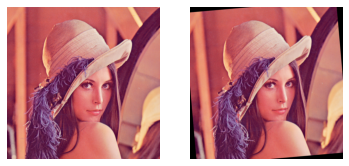

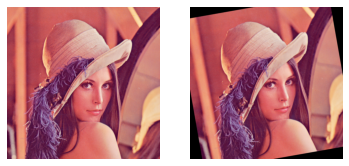

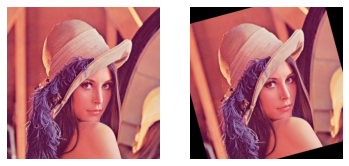

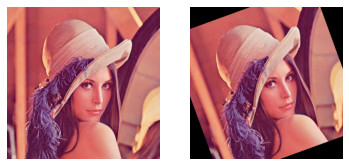

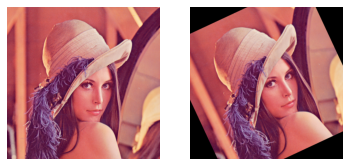

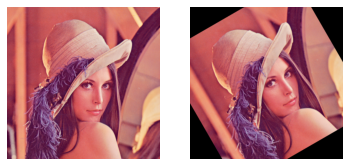

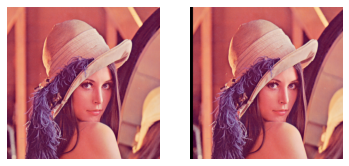

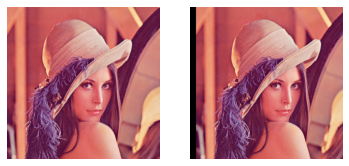

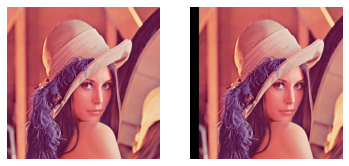

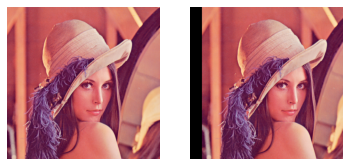

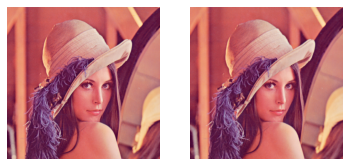

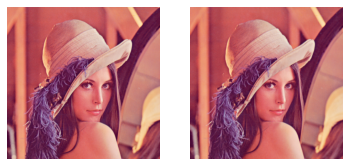

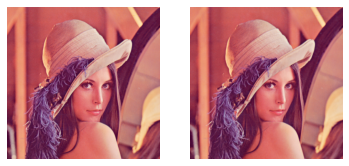

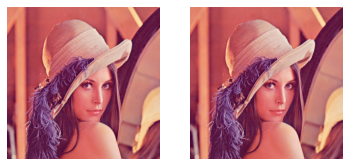

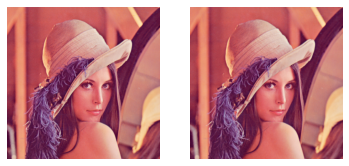

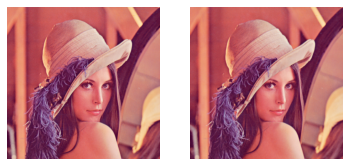

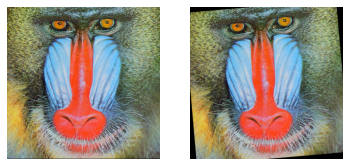

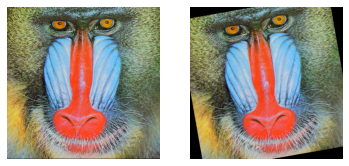

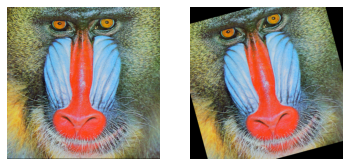

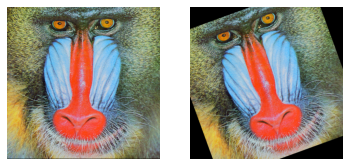

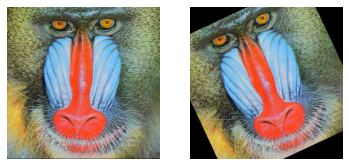

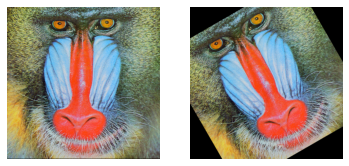

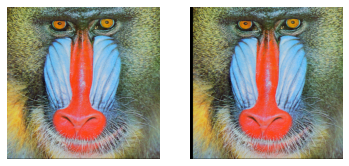

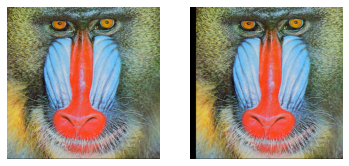

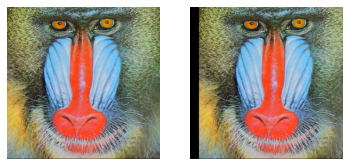

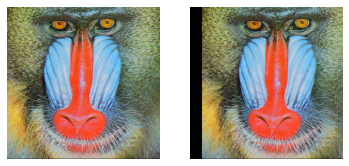

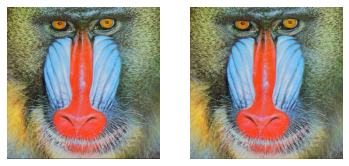

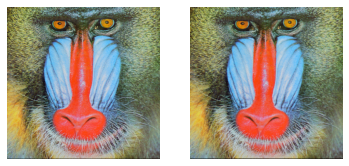

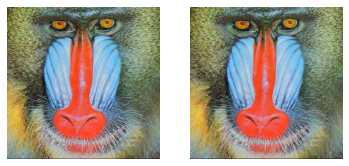

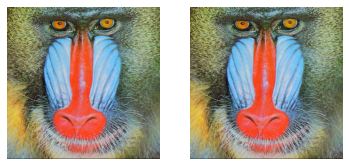

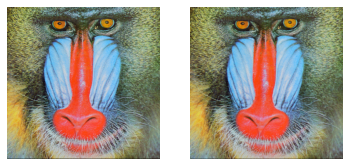

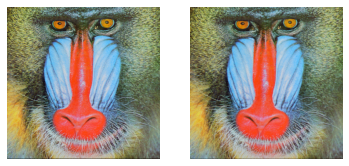

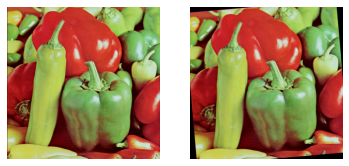

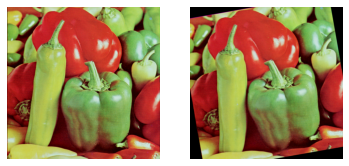

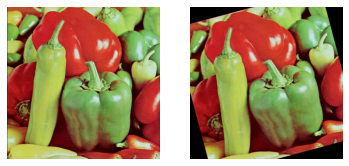

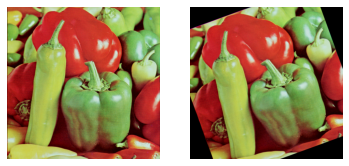

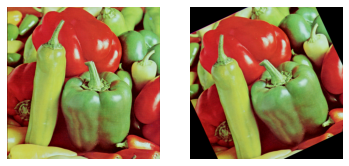

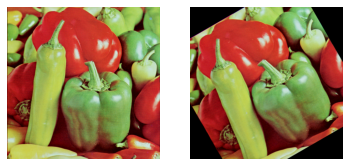

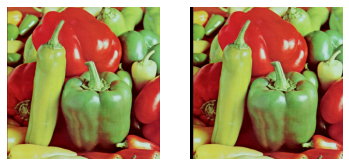

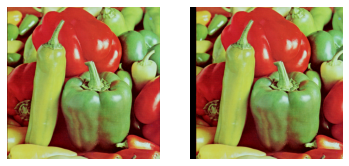

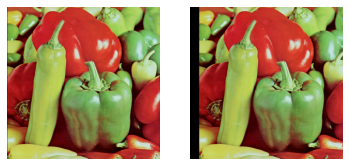

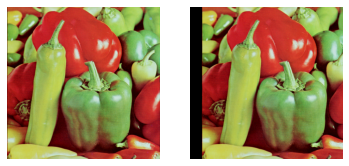

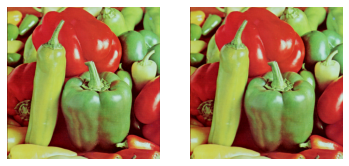

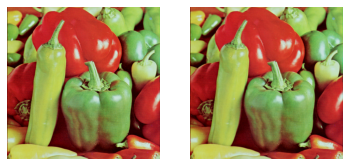

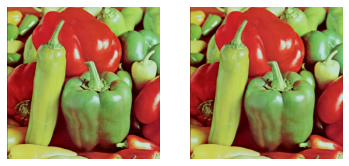

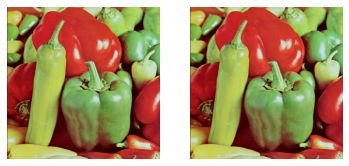

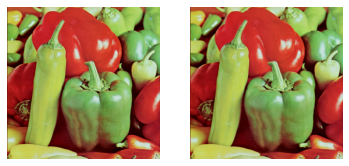

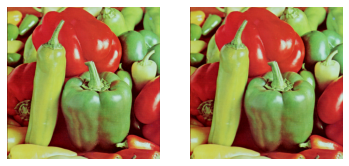

In [2]:
# Specify the folder with the images to be augmented
folder_path = "./imgs"
save_path = "./attacked_imgs"

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load image
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        angle = 5
        trans_x = 0
        trans_y = 0
        scale_fx = 1
        scale_fy = 1
        
        # Rotation attacks  
        for angle in range(5, 35, +5): 
            #rotated_img = rotate_image(img, angle, crop=False)
            rotated_img = imutils.rotate(img, angle)
            new_filename_1 = "rotated_" + str(angle) + "_" + filename
            new_img_path_1 = os.path.join(save_path, new_filename_1)
            cv2.imwrite(new_img_path_1, rotated_img)
            imshow(img, rotated_img, mode='BGR')
            
        
        # Translation attacks 
        for trans_x in range(10, 50, +10):
            traslated_Matrix = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
            translated_img = cv2.warpAffine(img, traslated_Matrix, (img.shape[1], img.shape[0]))
            #translated_img = translate_image(img, 0.01*trans_x, trans_y, crop=False)
            new_filename_2 = "translated_" + str(trans_x) + "_" + filename
            new_img_path_2 = os.path.join(save_path, new_filename_2)
            cv2.imwrite(new_img_path_2, translated_img)
            imshow(img, translated_img, mode='BGR')
        
        # Scaling attacks 
        for scale_fx in range(70, 125, +10):
            #print (0.01 * scale_fx)
            scaled_img = cv2.resize(img, None, fx = 0.01 * scale_fx, fy = 0.01 * scale_fx)
            new_filename_3 = "scaled_" + str(scale_fx) + "_" + filename
            new_img_path_3 = os.path.join(save_path, new_filename_3)
            cv2.imwrite(new_img_path_3, scaled_img)
            imshow(img, scaled_img, mode='BGR')
        
        

lena.png
Matched Points Number:645
scaled_110_lena.png, Scaling: 1.0997925424005637
Matched Points Number:536
rotated_10_lena.png, Rotation: 9.98267072184289
Matched Points Number:505
rotated_25_lena.png, Rotation: 24.990828664863866
Matched Points Number:561
Matched Points Number:561
translated_30_lena.png, Translation: (29.994935678064223,-0.0006255200124624761)
Matched Points Number:539
rotated_5_lena.png, Rotation: 4.987992871386153
Matched Points Number:575
scaled_100_lena.png, Scaling: 1.0
Matched Points Number:561
Matched Points Number:561
translated_20_lena.png, Translation: (19.999917125419987,-0.0010443699854241516)
Matched Points Number:283
scaled_70_lena.png, Scaling: 0.7002850775574041
Matched Points Number:557
Matched Points Number:557
translated_40_lena.png, Translation: (39.999820769069245,-0.0012982513106635535)
Matched Points Number:501
rotated_30_lena.png, Rotation: 29.995974902525433
Matched Points Number:466
scaled_90_lena.png, Scaling: 0.8995279154830316
Matched P

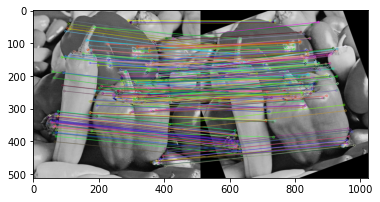

In [3]:
# Auto detect RST parameters
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load image
        img_path = os.path.join(folder_path, filename)
        ref = cv2.imread(img_path)
        print (filename)
        for fname in os.listdir(save_path):
            if fname.endswith(".jpg") or fname.endswith(".png"):
                comp_path = os.path.join(save_path, fname)
                cmp = cv2.imread(comp_path)
                if re.findall(filename, fname):
                    # Feature point chosen
                    #matcher = imregpoc.TempMatcher(ref,'AKAZE') #OK 
                    #matcher = imregpoc.TempMatcher(ref,'SIFT') #OK 
                    matcher = imregpoc.TempMatcher(ref,'KAZE') #OK
                    #matcher = imregpoc.TempMatcher(ref,'FREAK') #OK
                    #matcher = imregpoc.TempMatcher(ref,'ORB') #OK 
                    #matcher = imregpoc.TempMatcher(ref,'SURF') #NG
                    #matcher.match(cmp,1)
                    if re.findall("scaled", fname):
                        print(fname + ", Scaling: " + str(matcher.match(cmp,1)[0][3]))
                    elif re.findall("rotated", fname):
                        print(fname + ", Rotation: " + str(matcher.match(cmp,1)[0][2]))
                    elif re.findall("translated", fname):
                        print(fname + ", Translation: (" + str(matcher.match(cmp,1)[0][0][0]) +"," + str(matcher.match(cmp,1)[0][1][0]) + ")")
                        
                        